# Практическая работа №3: Кластерный анализ.
Выполнила студентка гр. 0373 Барбие Анастасия. Вариант №2
## Цель работы
Освоение основных понятий и некоторых методов кластерного анализа, в частности, метода k-means и метода поиска сгущений.
## Основные теоретические положения
Кластерный анализ - задача разбиения заданной выборки объектов на подмножества, называемые кластерами, так, чтобы каждый кластер состоял из схожих объектов, а объекты разных кластеров существенно отличались.

Этапы кластеризации:
> 1. Отбор выборки объектов.
> 2. Определение множества переменных, по которым будут оцениваться объекты в выборке. При необходимости - нормализация значений переменных (метод приведения к новому диапазону).
> 3. Вычисление значений меры сходства между объектами.
> 4. Применение метода кластерного анализа для создания групп сходных объектов (кластеров).
> 5. Предоставление результатов анализа.

Неотрицательная вещественная функция $d(x,y)$ называется *метрикой*, если:
>$d(x,y)\geq{0}$

>$d(x,y)=d(y,x)$

>$d(x,y)\leq{d(x,z)+d(z,y)}$

Евклидово расстояние: $d(x,y)=\sqrt{\sum_{i=1}^{n}(x_{i}-y_{i})^{2}}$

Расстояние городских кварталов: $d(x,y)=\sum_{i=1}^{n}|x_{i}-y_{i}|$

Нормализация: $x_{i} = \frac{x_{i}-\overline{x}}{\sigma}$

Алгоритм k-means - алгоритм кластеризации. Основная идея заключается в том, что на каждлй интерации пересчитывается центр масс (центроид) для каждого кластера, полученного на предыдущем шаге, затем векторы разбиваются на кластеры вновь в соответствии с тем, какой из новых центор оказался ближе по выбранной метрике (используется Евклидово расстояние).

Алгоритм k-medians - вариация алгоритма k-means, где для определения центра кластера вместо среднего вычисляется медиана по каждому из измерений (в данном алгоритме используется метрика: расстояние городских кварталов).

«Грубая» оценка количества кластеров - оценка количества кластеров, после которой увеличение количества кластеров нецелесообразно: $k=[\sqrt{\frac{n}{2}}]$

Метод локтя- многократное циклическое испоолнение алгоритма с увеличением количества выбираемых кластеров и откладыванием на графике разброса кластеризации, вычисленного как функция от количества кластеров. Разброс является мерой отношения внутриклассного расстояния:

$W_{C_{j}}=\sum_{x_{i}\in{C_{j}}}{(x_{i}-x_{C_{j}})^2}$, где

$W_{C_{j}}$ - разброс внутри кластера, 

$C_{j}$ - множество элекментов кластеров, 

$x_{C_{j}}$ - центр кластера.

С увеличением количества кластеров разброс стремится к нулю:

$W=\sum_{j=1}^{k}W_{C_{j}}$

FOREL-метод - на каждой итерации случайным образом выбирается объект из выборки, вокруг него раздувается сфера (окружность) радиуса R, внутри этой сферы выбирается центр тяжести (центр новой сферы). После того как центр сферы стабилизируется, все объекты внутри сферы с этим центром помечаются как кластеризованные и выкидываются из выборки. Этот процесс мы повторяется до тех пор, пока вся выборка не будет кластеризована. Радиус выбирается из промежутка: $[R_{min};R_{max}]$, где $R_{min}$ и $R_{max}$ получают из матрицы $D={ d_{ij}}$: $R_{min}=min\{d_{ij}\gt{0}\}, R_{max}=max\{ d_{ij}\}$"

Чувствительность: посчитать кластеризацию для какого-то R, взять $\tilde R = R + \epsilon$ и посмотреть насколько сильно будут расходиться результаты.
## Постановка задачи
Дано конечное множество из объектов, представленных двумя признаками (в качестве этого множества принимаем исходную двумерную выборку, сформированную ранее в практической работе №2). Выполнить разбиение исходного множества объектов на конечное число подмножеств(кластеров) с использованием метода k-means и метода поиска сгущений. Полученные результаты содержательно проинтерпретировать."
## Выполнение работы
### Пункт 1
Нормализовать множество точек из предыдущей работы, отобразить полученное множество.
     

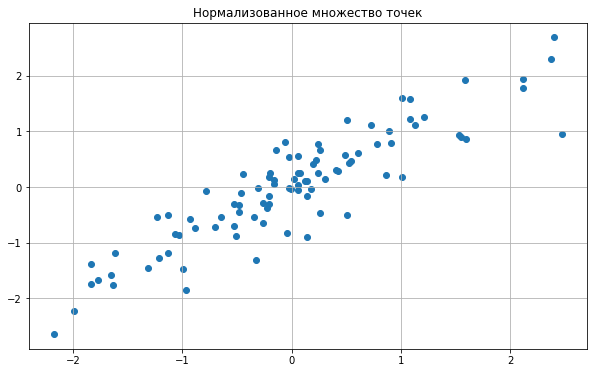

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

selecty = [153.3, 162.3, 112.9, 124.5, 124.2, 74.1, 148.5, 105.8, 139.4, 105.3, 86.8, 82.7, 85.1, 128.5, 89.0, 128.9, 132.5, 109.3, 118.0, 140.9, 187.4, 154.5,
121.8, 121.7, 112.1, 146.8, 140.8, 108.6, 128.0, 122.9, 115.1, 166.4, 144.0, 147.3, 161.8, 112.8, 91.9, 114.0, 112.9, 135.2, 170.1, 125.0, 130.8, 169.6, 137.7,
98.1, 95.3, 118.6, 131.3, 178.5, 110.5, 116.7, 106.2, 130.4, 84.9, 96.1, 98.0, 113.9, 132.0, 109.0, 93.5, 118.4, 105.6, 151.1, 131.2, 126.4, 131.4, 138.2, 128.6,
104.7, 129.4, 134.9, 151.2, 124.5, 138.7, 127.7, 114.8, 91.4, 131.1, 143.2, 125.0, 129.4, 123.9, 153.6, 136.4, 64.5, 145.3, 146.1, 118.4, 143.1, 126.7, 136.7, 143.8]

selectx=[480, 510, 411, 449, 453, 331, 503, 386, 486, 419, 344, 392, 340, 440, 351, 468, 474, 418, 421, 465, 593, 
522, 437, 458, 394, 541, 441, 397, 458, 422, 421, 576, 446, 597, 514, 376, 371, 480, 429, 481, 576, 431, 423, 544, 448, 
382, 430, 434, 464, 591, 434, 436, 447, 501, 352, 377, 353, 382, 475, 408, 340, 437, 388, 517, 453, 453, 438, 453, 451, 
458, 437, 461, 493, 460, 479, 457, 465, 390, 454, 464, 448, 510, 403, 514, 482, 320, 545, 542, 418, 496, 440, 463, 504]

srx,sry=0,0
for i in range(len(selectx)):
    srx+=selectx[i]/len(selectx)
    sry+=selecty[i]/len(selectx)
dispx,dispy=0,0
for i in range(len(selectx)):
    dispx+=(selectx[i]-srx)**2/len(selectx)
    dispy+=(selecty[i]-sry)**2/len(selectx)
sko=np.sqrt(dispx)
skoy=np.sqrt(dispy)
for i in range(len(selectx)):
    selectx[i]=(selectx[i]-srx)/sko
    selecty[i]=(selecty[i]-sry)/skoy
plt.subplots(figsize=(10, 6))
plt.scatter(selectx,selecty)
plt.title("Нормализованное множество точек")
plt.grid()
plt.show()

### Пункт 2
Определить «грубую» верхнюю оценку количества кластеров.

In [ ]:
grho=int(np.sqrt(len(selectx)/2))
print("«Грубая» верхняя оценка количества кластеров:",grho)

«Грубая» верхняя оценка количества кластеров: 6


### Пункт 3
Реализовать алгоритм k-means. Отобразить полученные кластеры,каждый кластер выделить разным цветом или маркером, отметить центроиды.

Центроиды: [[0.0, 0.0]]
Количество элементов в кластерах [93]


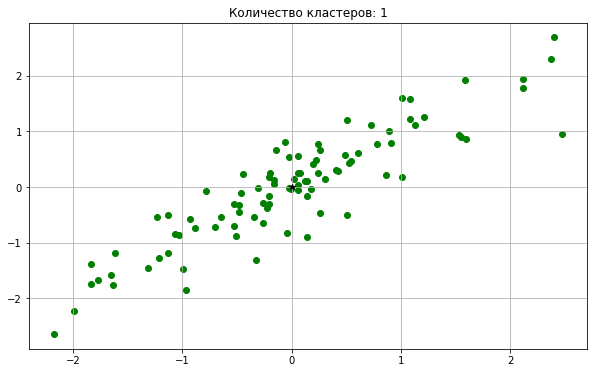

Центроиды: [[-0.63, -0.66], [0.84, 0.87]]
Количество элементов в кластерах [53, 40]


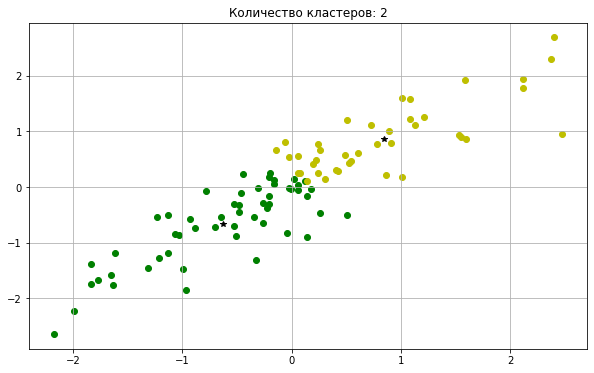

Центроиды: [[-1.21, -1.23], [0.04, 0.07], [1.42, 1.36]]
Количество элементов в кластерах [24, 50, 19]


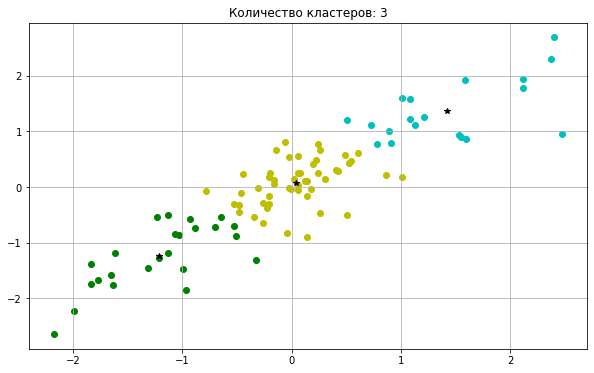

Центроиды: [[-0.56, -0.58], [-1.55, -1.65], [0.17, 0.24], [1.46, 1.4]]
Количество элементов в кластерах [23, 13, 39, 18]


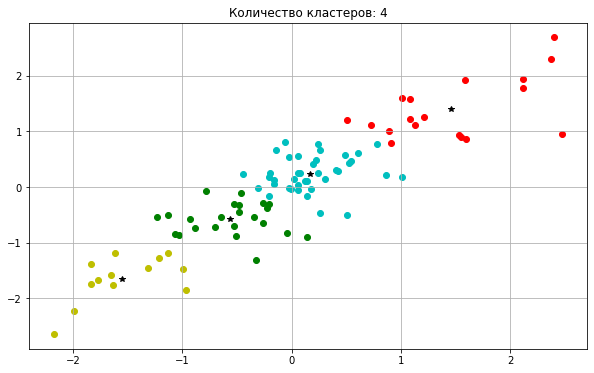

Центроиды: [[-0.56, -0.58], [-1.55, -1.65], [0.05, 0.16], [1.75, 1.56], [0.7, 0.74]]
Количество элементов в кластерах [23, 13, 30, 12, 15]


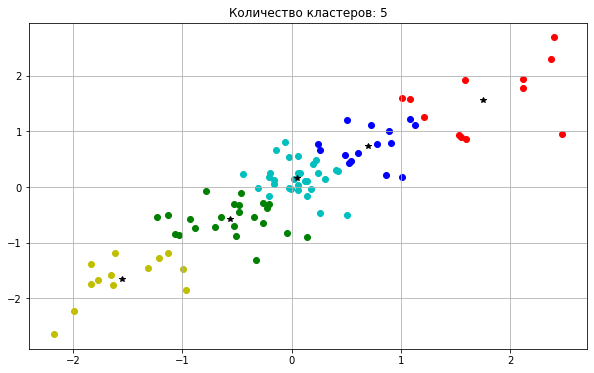

Центроиды: [[-0.6, -0.63], [-0.03, 0.05], [-1.45, -1.5], [-2.08, -2.43], [1.66, 1.5], [0.5, 0.61]]
Количество элементов в кластерах [20, 27, 11, 2, 14, 19]


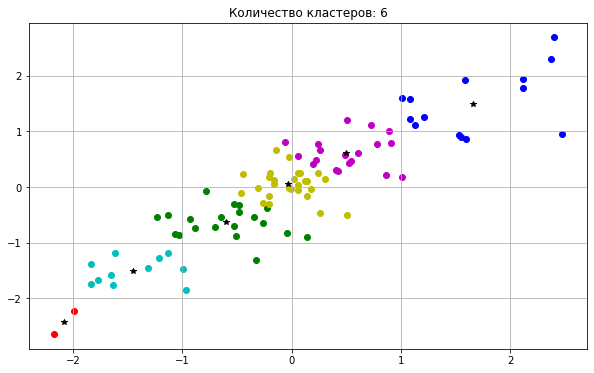

In [ ]:
from prettytable import PrettyTable
C = [[[selectx[17], selecty[17]]],
     [[selectx[17], selecty[17]],[selectx[83], selecty[83]]],
     [[selectx[17], selecty[17]],[selectx[74], selecty[74]],[selectx[83], selecty[83]]],
     [[selectx[17], selecty[17]],[selectx[60], selecty[60]],[selectx[75], selecty[75]],[selectx[83], selecty[83]]],
     [[selectx[17], selecty[17]],[selectx[60], selecty[60]],[selectx[75], selecty[75]],[selectx[83], selecty[83]],[selectx[92], selecty[92]]],
     [[selectx[17], selecty[17]],[selectx[41], selecty[41]],[selectx[60], selecty[60]],[selectx[85], selecty[85]],[selectx[83], selecty[83]],[selectx[92], selecty[92]]],
    [[selectx[17], selecty[17]],[selectx[41], selecty[41]],[selectx[60], selecty[60]],[selectx[72], selecty[72]],[selectx[79], selecty[79]],[selectx[83], selecty[83]],[selectx[92], selecty[92]]]]
myTable = PrettyTable(["Значение k","Центроиды кластера","Объем кластера"])
myTable1 = PrettyTable(["Значение k","Центроиды кластера","Объем кластера"])
koorC=[] 
koorx=[]
koory=[]
def Kmeans(x,y,Center,n):
    smes=np.inf
    while smes>0.001:    
        list_x=[]
        list_y=[]
        for i in range(n):
            list_x+=[[]]
            list_y+=[[]]
        for i in range(len(x)):
            dist=[0]*n
            for j in range(n):
                dist[j]=((x[i]-Center[j][0])**2+(y[i]-Center[j][1])**2)
            min=100
            for k in range(n):
                if dist[k]<min:
                    min=dist[k]
                    l=k
            list_x[l]+=[x[i]]
            list_y[l]+=[y[i]]
        sum_x=[0]*n
        sum_y=[0]*n
        smes_c=[0]*n
        for i in range(n):
            sum_x[i]=sum(list_x[i])/len(list_x[i])
            sum_y[i]=sum(list_y[i])/len(list_y[i])
        for i in range(n):
            smes_c[i]=(sum_x[i]-Center[i][0])**2+(sum_y[i]-Center[i][1])**2
        smes=sum(smes_c)
        for i in range(n):
            Center[i][0]=round(sum_x[i],2)
            Center[i][1]=round(sum_y[i],2)
        c=[]
        for i in range(n):
            c+=[len(list_x[i])]
    return Center, list_x,list_y,c

def print_gr(Center,list_x,list_y,n):
    fig, graf=plt.subplots(figsize=(10, 6))
    color = ['g','y','c','r','b','m']
    for i in range(n):
        graf.scatter(list_x[i],list_y[i],c=color[i])
        graf.plot(Center[i][0],Center[i][1],'k',marker="*")
    graf.set_title('Количество кластеров: %i'%(i+1))
    plt.grid()
    plt.show()
for i in range(grho):
    Center,list_x,list_y,kol_el=Kmeans(selectx,selecty,C[i],i+1)
    print("Центроиды:", Center)
    koorC.append(Center) 
    koorx.append(list_x)
    koory.append(list_y)
    print("Количество элементов в кластерах",kol_el)
    print_gr(Center,list_x,list_y,i+1)
    myTable.add_row([i+1,Center[0],kol_el[0]])
    for j in range(1,i+1):
        myTable.add_row(["",Center[j],kol_el[j]])

### Пункт 4
Реализовать алгоритм k-medoids. Отобразить полученные кластеры, каждый кластер выделить разным цветом или маркером, отметить центроиды.

центроиды: [[-0.02737, -0.01612]]
кол-во элементов в кластерах [93]


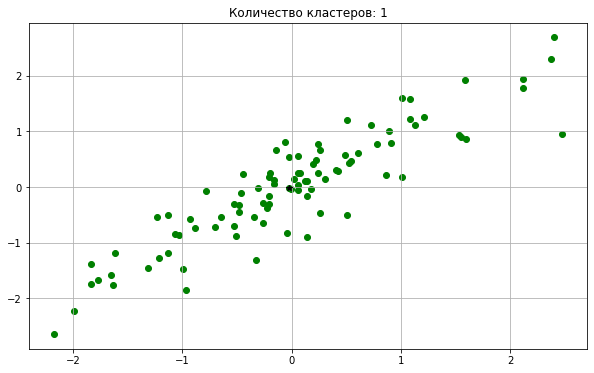

центроиды: [[-0.64697, -0.5403], [0.89365, 1.00192]]
кол-во элементов в кластерах [56, 37]


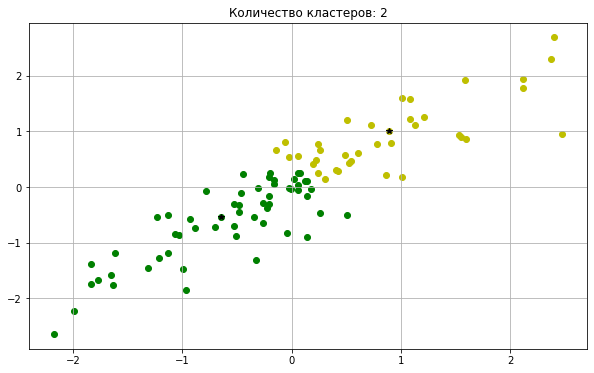

центроиды: [[-1.21632, -1.26809], [0.05636, 0.04453], [1.21182, 1.26185]]
кол-во элементов в кластерах [23, 51, 19]


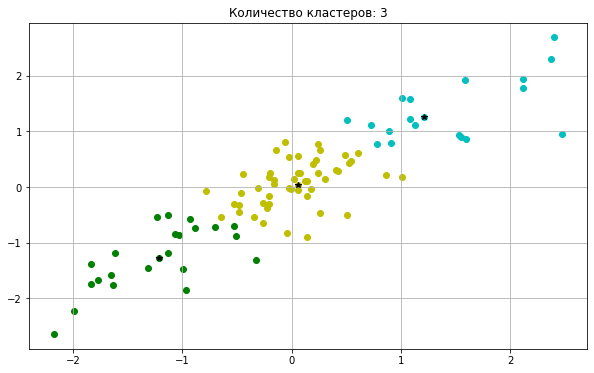

центроиды: [[-0.64697, -0.5403], [-1.65172, -1.57567], [0.24056, 0.2568], [1.21182, 1.26185]]
кол-во элементов в кластерах [24, 13, 37, 19]


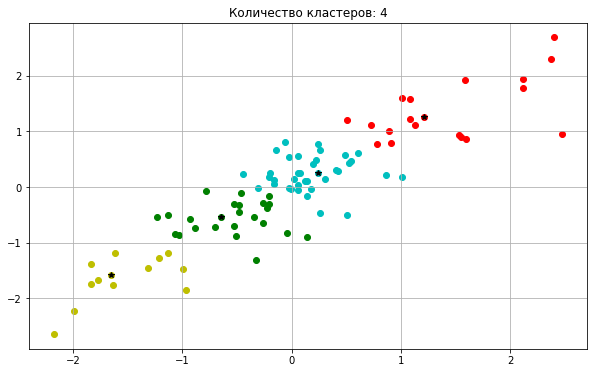

центроиды: [[-0.64697, -0.5403], [-1.65172, -1.57567], [0.02287, 0.13984], [1.21182, 1.26185], [0.49175, 0.57738]]
кол-во элементов в кластерах [23, 13, 26, 16, 15]


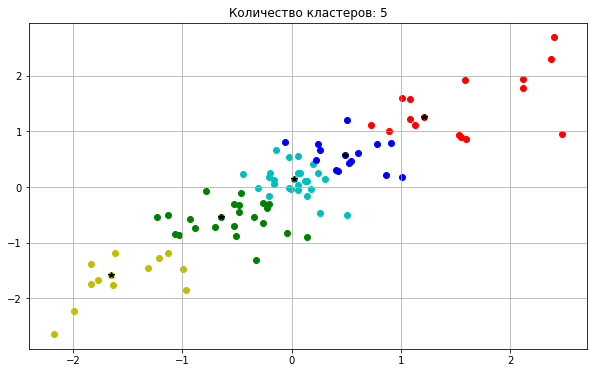

центроиды: [[-0.6972, -0.70925], [-0.02737, -0.01612], [-1.3168, -1.45004], [-1.98663, -2.22115], [1.21182, 1.26185], [0.49175, 0.57738]]
кол-во элементов в кластерах [19, 26, 10, 3, 16, 19]


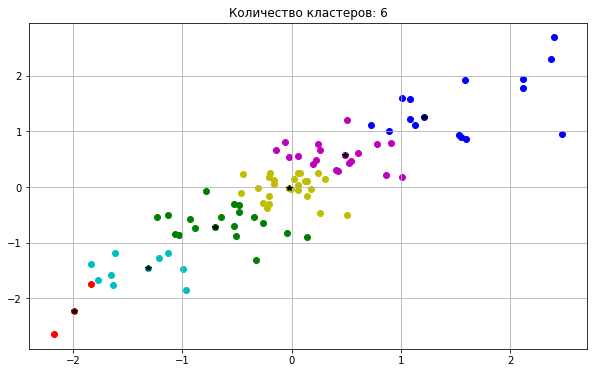

In [ ]:
strtcnt = [[[selectx[17], selecty[17]]],
     [[selectx[17], selecty[17]],[selectx[83], selecty[83]]],
     [[selectx[17], selecty[17]],[selectx[74], selecty[74]],[selectx[83], selecty[83]]],
     [[selectx[17], selecty[17]],[selectx[60], selecty[60]],[selectx[75], selecty[75]],[selectx[83], selecty[83]]],
     [[selectx[17], selecty[17]],[selectx[60], selecty[60]],[selectx[75], selecty[75]],[selectx[83], selecty[83]],[selectx[92], selecty[92]]],
     [[selectx[17], selecty[17]],[selectx[41], selecty[41]],[selectx[60], selecty[60]],[selectx[85], selecty[85]],[selectx[83], selecty[83]],[selectx[92], selecty[92]]],
    [[selectx[17], selecty[17]],[selectx[41], selecty[41]],[selectx[60], selecty[60]],[selectx[72], selecty[72]],[selectx[79], selecty[79]],[selectx[83], selecty[83]],[selectx[92], selecty[92]]]]
table1 = PrettyTable(["Значение k","Центроиды кластера","Объём кластера"]) 
# алгоритм k-medoids
def kmedoids(x,y,cntr,N): 
    chtt=np.inf
    while chtt>0.01:
        spskx=[]
        spsky=[]  
        for i in range(N):
            spskx=spskx+[[]]
            spsky=spsky+[[]]       
        for i in range(len(x)):
            gip=[0]*N
            for j in range(N):
                gip[j]=((x[i]-cntr[j][0])**2+(y[i]-cntr[j][1])**2) 
            pr=100
            l=0
            for k in range(N):
                if gip[k]<pr:
                    pr=gip[k]
                    l=k
            spskx[l]=spskx[l]+[x[i]]
            spsky[l]=spsky[l]+[y[i]]
        index=[0]*N
        for i in range(N):
            summa=[0]*(len(spskx[i]))
            for j in range(len(spskx[i])):
                for k in range(len(spskx[i])):
                    if (k!=j):
                        summa[j]=summa[j]+((spskx[i][j]-spskx[i][k])**2+(spsky[i][j]-spsky[i][k])**2)       
            index[i]=summa.index(min(summa))
        chtt_c=[0]*N
        for i in range(N):
            chtt_c[i]=(spskx[i][index[i]]-cntr[i][0])**2+(spsky[i][index[i]]-cntr[i][1])**2
        chtt=sum(chtt_c)
        for i in range(N):
            cntr[i][0]=round(spskx[i][index[i]],5)
            cntr[i][1]=round(spsky[i][index[i]],5)
        cen=[]
        for i in range(N):
            cen=cen+[len(spskx[i])]        
    return cntr,spskx,spsky,cen

koorC2=[]
koorx2=[]
koory2=[]
for i in range(grho):
    cntr,spskx,spsky,kol=kmedoids(selectx,selecty,strtcnt[i],i+1)
    koorC2.append(cntr)
    koorx2.append(spskx)
    koory2.append(spsky)
    print("центроиды:", cntr)
    print("кол-во элементов в кластерах",kol)
    print_gr(cntr,spskx,spsky,i+1)
    table1.add_row([i+1,cntr[0],kol[0]])
    for j in range(1,i+1):
        table1.add_row(["",cntr[j],kol[j]])

### Пункт 5
Для каждого метода заполнить таблицу.

In [ ]:
print("Алгоритм k-means:",'\nmyTable')
print("Алгоритм k-medoids:",'\ntable1')

Алгоритм k-means:
+------------+--------------------+----------------+
| Значение k | Центроиды кластера | Объем кластера |
+------------+--------------------+----------------+
|     1      |     [0.0, 0.0]     |       93       |
|     2      |   [-0.63, -0.66]   |       53       |
|            |    [0.84, 0.87]    |       40       |
|     3      |   [-1.21, -1.23]   |       24       |
|            |    [0.04, 0.07]    |       50       |
|            |    [1.42, 1.36]    |       19       |
|     4      |   [-0.56, -0.58]   |       23       |
|            |   [-1.55, -1.65]   |       13       |
|            |    [0.17, 0.24]    |       39       |
|            |    [1.46, 1.4]     |       18       |
|     5      |   [-0.56, -0.58]   |       23       |
|            |   [-1.55, -1.65]   |       13       |
|            |    [0.05, 0.16]    |       30       |
|            |    [1.75, 1.56]    |       12       |
|            |    [0.7, 0.74]     |       15       |
|     6      |   [-0.6, -0.6

### Пункт 6
С помощью метода локтя выявить для каждого метода оптимальное количество кластеров.


k-means:


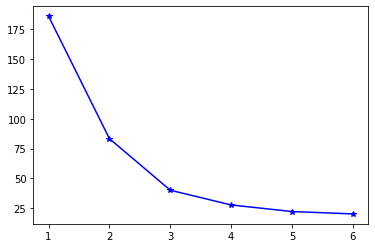

k-medoids:


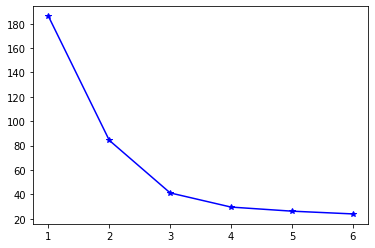

In [ ]:
W=[0]*6
K=[0]*6
for i in range(1,grho+1):
    K[i-1]=i
for i in range(grho):
    cym_w=0
    for j in range(len(koorC[i])):
        w1=0
        for k in range(len(koorx[i][j])):
            w1=w1+((koorx[i][j][k]-koorC[i][j][0])**2+(koory[i][j][k]-koorC[i][j][1])**2)
        cym_w=cym_w+w1
    W[i]=cym_w
W2=[0]*6
K2=[0]*6
for i in range(1,grho+1):
    K2[i-1]=i
for i in range(grho):
    cym_w2=0
    for j in range(len(koorC2[i])):
        w2=0
        for k in range(len(koorx2[i][j])):
            w2=w2+((koorx2[i][j][k] - koorC2[i][j][0])**2 + (koory2[i][j][k] - koorC2[i][j][1])**2)
        cym_w2=cym_w2+w2
    W2[i]=cym_w2
print("k-means:")
plt.plot(K,W,c='b',marker='*')
plt.show()
print("k-medoids:")
plt.plot(K2,W2,c='b',marker='*')
plt.show()

Вывод: оптимальное количество кластеров на графике выглядит как перегиб функции, напоминающей локоть. Исходя из полученных графиков, оптимальное количество кластеров для алгоритмов равно 3.
### Пункт 7
Реализовать алгоритм поиска сгущений при различных радиусах 𝑅, отобразить полученные кластеры, выделить каждый кластер разным цветом или маркером, отметить центроиды. Результаты представить в виде таблицы

Rmin =  0.017
Rmax =  7.018
Радиус R =  7.018
Количество кластеров: 1
Центроиды: [[0. 0.]]
Объем кластеров: [93]


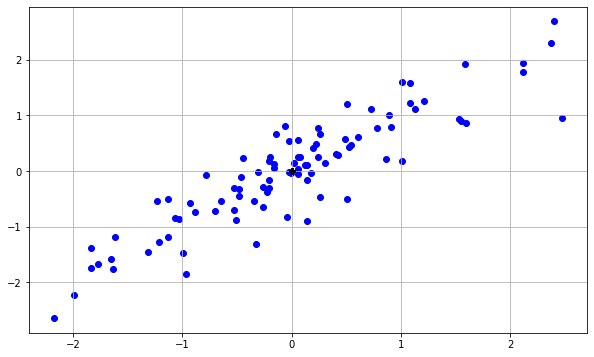

+------------+--------------------+----------------+
| Значение R | Центроиды кластера | Объем кластера |
+------------+--------------------+----------------+
|   7.018    |     [0.0, 0.0]     |       93       |
+------------+--------------------+----------------+
Радиус R =  2.018
Количество кластеров: 3
Центроиды: [[ 0.049  0.077]
 [-1.679 -1.747]
 [ 2.175  1.928]]
Объем кластеров: [77, 10, 6]


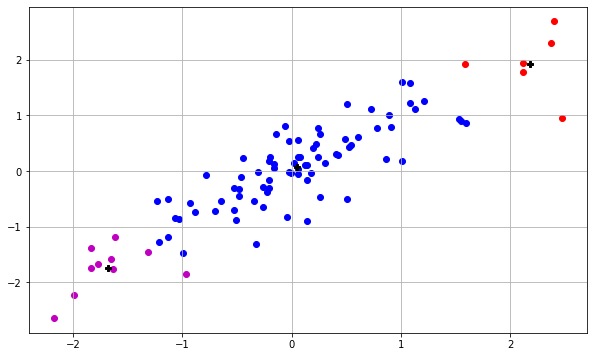

+------------+--------------------+----------------+
| Значение R | Центроиды кластера | Объем кластера |
+------------+--------------------+----------------+
|   7.018    |     [0.0, 0.0]     |       93       |
|   2.018    |   [0.049, 0.077]   |       77       |
|            |  [-1.679, -1.747]  |       10       |
|            |   [2.175, 1.928]   |       6        |
+------------+--------------------+----------------+
Радиус R =  1.218
Количество кластеров: 6
Центроиды: [[-0.007  0.018]
 [ 1.294  1.316]
 [-1.338 -1.341]
 [ 2.384  2.494]
 [ 2.468  0.95 ]
 [-2.171 -2.637]]
Объем кластеров: [58, 14, 17, 2, 1, 1]


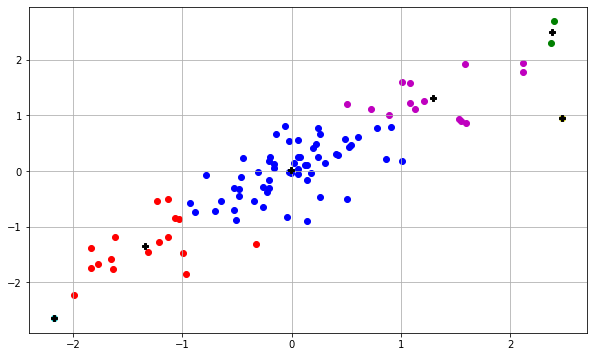

+------------+--------------------+----------------+
| Значение R | Центроиды кластера | Объем кластера |
+------------+--------------------+----------------+
|   7.018    |     [0.0, 0.0]     |       93       |
|   2.018    |   [0.049, 0.077]   |       77       |
|            |  [-1.679, -1.747]  |       10       |
|            |   [2.175, 1.928]   |       6        |
|   1.218    |  [-0.007, 0.018]   |       58       |
|            |   [1.294, 1.316]   |       14       |
|            |  [-1.338, -1.341]  |       17       |
|            |   [2.384, 2.494]   |       2        |
|            |   [2.468, 0.95]    |       1        |
|            |  [-2.171, -2.637]  |       1        |
+------------+--------------------+----------------+
Радиус R =  1.018
Количество кластеров: 6
Центроиды: [[ 0.017  0.046]
 [ 1.113  1.163]
 [-1.19  -1.173]
 [-2.079 -2.429]
 [ 2.25   2.176]
 [ 2.468  0.95 ]]
Объем кластеров: [52, 14, 20, 2, 4, 1]


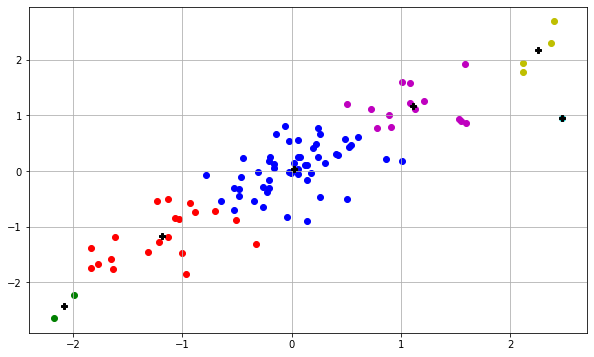

+------------+--------------------+----------------+
| Значение R | Центроиды кластера | Объем кластера |
+------------+--------------------+----------------+
|   7.018    |     [0.0, 0.0]     |       93       |
|   2.018    |   [0.049, 0.077]   |       77       |
|            |  [-1.679, -1.747]  |       10       |
|            |   [2.175, 1.928]   |       6        |
|   1.218    |  [-0.007, 0.018]   |       58       |
|            |   [1.294, 1.316]   |       14       |
|            |  [-1.338, -1.341]  |       17       |
|            |   [2.384, 2.494]   |       2        |
|            |   [2.468, 0.95]    |       1        |
|            |  [-2.171, -2.637]  |       1        |
|   1.018    |   [0.017, 0.046]   |       52       |
|            |   [1.113, 1.163]   |       14       |
|            |  [-1.19, -1.173]   |       20       |
|            |  [-2.079, -2.429]  |       2        |
|            |   [2.25, 2.176]    |       4        |
|            |   [2.468, 0.95]    |       1   

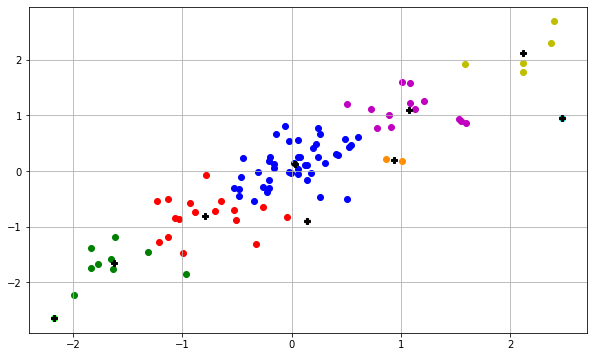

+------------+--------------------+----------------+
| Значение R | Центроиды кластера | Объем кластера |
+------------+--------------------+----------------+
|   7.018    |     [0.0, 0.0]     |       93       |
|   2.018    |   [0.049, 0.077]   |       77       |
|            |  [-1.679, -1.747]  |       10       |
|            |   [2.175, 1.928]   |       6        |
|   1.218    |  [-0.007, 0.018]   |       58       |
|            |   [1.294, 1.316]   |       14       |
|            |  [-1.338, -1.341]  |       17       |
|            |   [2.384, 2.494]   |       2        |
|            |   [2.468, 0.95]    |       1        |
|            |  [-2.171, -2.637]  |       1        |
|   1.018    |   [0.017, 0.046]   |       52       |
|            |   [1.113, 1.163]   |       14       |
|            |  [-1.19, -1.173]   |       20       |
|            |  [-2.079, -2.429]  |       2        |
|            |   [2.25, 2.176]    |       4        |
|            |   [2.468, 0.95]    |       1   

In [ ]:
matr=np.zeros((len(selectx),len(selectx)))
Rmin=1000
Rmax=-1
for i in range(len(selectx)):
    for j in range(len(selectx)):
        if i>j:
            matr[j][i]=((selectx[i]-selectx[j])**2 + (selecty[i]-selecty[j])**2)**0.5
matr=matr.tolist()
for i in range(len(selectx)):
    for j in range(len(selectx)):
        if Rmax<matr[i][j]:
            Rmax=matr[i][j]
        if (Rmin>matr[i][j]) &(matr[i][j]>0):
            Rmin=matr[i][j]
print("Rmin = ",round(Rmin,3))
print("Rmax = ",round(Rmax,3))

def gr(center,cl):
    fig, graf=plt.subplots(figsize=(10, 6))
    color= ['b','m','r','g','y','c','darkorange','pink','lime','blueviolet','gold','skyblue','olive','lightgreen','grey','magenta','violet','brown','peru']
    for j in range(len(cl)):
        for k in range(len(cl[j])):
            graf.scatter(cl[j][k][0],cl[j][k][1],c=color[j])
        plt.plot(center[j][0],center[j][1],'k',marker="P")   
    plt.grid()
    plt.show()
R=[Rmax,Rmax-5,Rmax-5.8,Rmax-6,Rmax-6.2]
def FOREL(x, y, R):
    center= []
    clusters = []
    u=[]
    kol_el=[]
    for i in range(len(x)):
        u+=[[x[i],y[i]]]
    while (len(u)!=0):
        xc = u[0]
        while True:
            k=[]
            for i in range(len(u)):
                if ((xc[0]-u[i][0])**2 + (xc[1]-u[i][1])**2)**0.5 <= R:
                    k+=[u[i]]
            xc_=[0,0]
            for i in range(len(k)):
                xc_[0]+=k[i][0]/len(k)
                xc_[1]+=k[i][1]/len(k)
            if xc == xc_:
                break
            xc = xc_
        u = [i for i in u if i not in k]
        center+=[xc]
        clusters+=[k]
        kol_el+=[len(k)]
    
    return center,clusters,kol_el
myTable3 = PrettyTable(["Значение R","Центроиды кластера","Объем кластера"])
for i in range(len(R)):
    center,cl,kol_el=FOREL(selectx,selecty,R[i]) 
    print("Радиус R = ", round(R[i],3))
    print("Количество кластеров:",len(cl))
    for k in range(len(cl)):
        for j in range(len(center[k])):
            center[k][j]=round(center[k][j],3)   
    print("Центроиды:", np.array(center))
    print("Объем кластеров:",kol_el)
    myTable3.add_row([round(R[i],3),center[0],kol_el[0]])
    for j in range(1,len(cl)):
        myTable3.add_row(["",center[j],kol_el[j]])
    gr(center,cl)
    
    print(myTable3)

### Пункт 8
Проверить чувствительность метода поиска сгущений к погрешностям. Сделать выводы.

Количество кластеров: 1
Центроиды: [[0. 0.]]
Объем кластеров: [93]


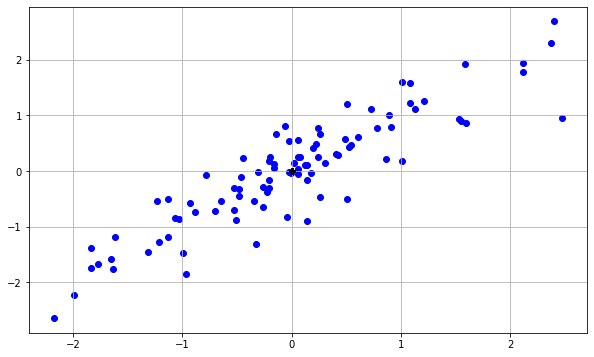

+------------+--------------------+----------------+
| Значение R | Центроиды кластера | Объем кластера |
+------------+--------------------+----------------+
|   7.019    |     [0.0, 0.0]     |       93       |
+------------+--------------------+----------------+
Количество кластеров: 3
Центроиды: [[ 0.049  0.077]
 [-1.679 -1.747]
 [ 2.175  1.928]]
Объем кластеров: [77, 10, 6]


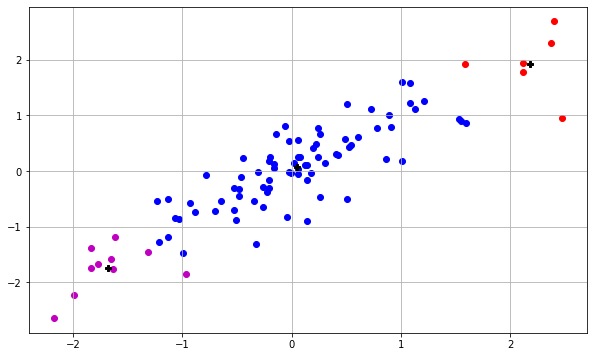

+------------+--------------------+----------------+
| Значение R | Центроиды кластера | Объем кластера |
+------------+--------------------+----------------+
|   7.019    |     [0.0, 0.0]     |       93       |
|   2.019    |   [0.049, 0.077]   |       77       |
|            |  [-1.679, -1.747]  |       10       |
|            |   [2.175, 1.928]   |       6        |
+------------+--------------------+----------------+
Количество кластеров: 6
Центроиды: [[-0.007  0.018]
 [ 1.294  1.316]
 [-1.338 -1.341]
 [ 2.384  2.494]
 [ 2.468  0.95 ]
 [-2.171 -2.637]]
Объем кластеров: [58, 14, 17, 2, 1, 1]


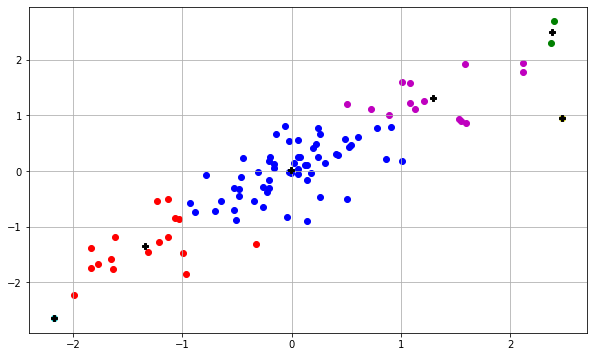

+------------+--------------------+----------------+
| Значение R | Центроиды кластера | Объем кластера |
+------------+--------------------+----------------+
|   7.019    |     [0.0, 0.0]     |       93       |
|   2.019    |   [0.049, 0.077]   |       77       |
|            |  [-1.679, -1.747]  |       10       |
|            |   [2.175, 1.928]   |       6        |
|   1.219    |  [-0.007, 0.018]   |       58       |
|            |   [1.294, 1.316]   |       14       |
|            |  [-1.338, -1.341]  |       17       |
|            |   [2.384, 2.494]   |       2        |
|            |   [2.468, 0.95]    |       1        |
|            |  [-2.171, -2.637]  |       1        |
+------------+--------------------+----------------+
Количество кластеров: 6
Центроиды: [[ 0.017  0.046]
 [ 1.113  1.163]
 [-1.19  -1.173]
 [-2.079 -2.429]
 [ 2.25   2.176]
 [ 2.468  0.95 ]]
Объем кластеров: [52, 14, 20, 2, 4, 1]


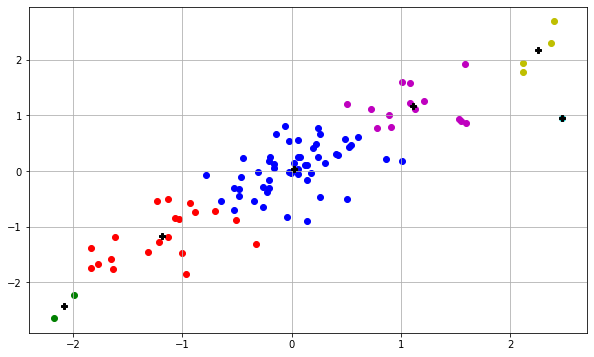

+------------+--------------------+----------------+
| Значение R | Центроиды кластера | Объем кластера |
+------------+--------------------+----------------+
|   7.019    |     [0.0, 0.0]     |       93       |
|   2.019    |   [0.049, 0.077]   |       77       |
|            |  [-1.679, -1.747]  |       10       |
|            |   [2.175, 1.928]   |       6        |
|   1.219    |  [-0.007, 0.018]   |       58       |
|            |   [1.294, 1.316]   |       14       |
|            |  [-1.338, -1.341]  |       17       |
|            |   [2.384, 2.494]   |       2        |
|            |   [2.468, 0.95]    |       1        |
|            |  [-2.171, -2.637]  |       1        |
|   1.019    |   [0.017, 0.046]   |       52       |
|            |   [1.113, 1.163]   |       14       |
|            |  [-1.19, -1.173]   |       20       |
|            |  [-2.079, -2.429]  |       2        |
|            |   [2.25, 2.176]    |       4        |
|            |   [2.468, 0.95]    |       1   

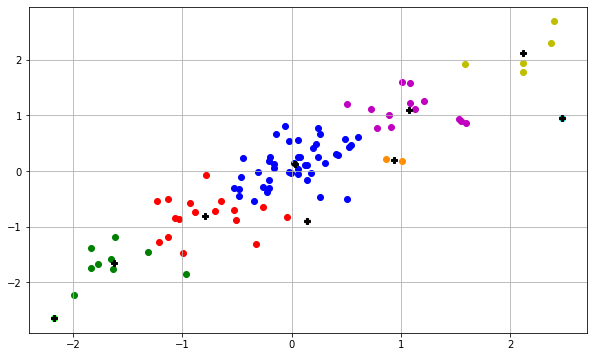

+------------+--------------------+----------------+
| Значение R | Центроиды кластера | Объем кластера |
+------------+--------------------+----------------+
|   7.019    |     [0.0, 0.0]     |       93       |
|   2.019    |   [0.049, 0.077]   |       77       |
|            |  [-1.679, -1.747]  |       10       |
|            |   [2.175, 1.928]   |       6        |
|   1.219    |  [-0.007, 0.018]   |       58       |
|            |   [1.294, 1.316]   |       14       |
|            |  [-1.338, -1.341]  |       17       |
|            |   [2.384, 2.494]   |       2        |
|            |   [2.468, 0.95]    |       1        |
|            |  [-2.171, -2.637]  |       1        |
|   1.019    |   [0.017, 0.046]   |       52       |
|            |   [1.113, 1.163]   |       14       |
|            |  [-1.19, -1.173]   |       20       |
|            |  [-2.079, -2.429]  |       2        |
|            |   [2.25, 2.176]    |       4        |
|            |   [2.468, 0.95]    |       1   

In [ ]:
Table4 = PrettyTable(["Значение R","Центроиды кластера","Объем кластера"])
for i in range(len(R)):
    R[i]=R[i]+0.001
    center,cl,kol_el=FOREL(selectx,selecty,R[i])
    for k in range(len(cl)):
        for j in range(len(center[k])):
            center[k][j]=round(center[k][j],3)
    Table4.add_row([round(R[i],3),center[0],kol_el[0]])
    for j in range(1,len(cl)):
        Table4.add_row(["",center[j],kol_el[j]])
    print("Количество кластеров:",len(cl))
    print("Центроиды:", np.array(center))
    print("Объем кластеров:",kol_el)
    gr(center,cl)
    
    print(Table4)

Вывод: при сравнении таблиц 7 и 8 пункта отличия не были выявлены, следовательно, метод поиска сгущений нечувствителен к погрешностям.
### Пункт 9
Сравнить методы. Сделать выводы.

Анализируя результаты метода локтя, можно утверждать, что для предоставленной выборки оптимальные количество кластеров равно 3 (и для алгоритма k-means, и для алгоритма k-medoids).

При использовании метода поиска сгущений объёмы полученных кластеров заметно разнятся друг от друга, в отличии от методов k-means и k-medoids. Следовательно, целесообразно использование методов k-means и k-medoids для данной выборки.
### Выводы
При выполнении практической работы была нормализованна двумерная выборка. Освоены основные понятия и некоторые методы кластерного анализа, в частности, метод k-means, k-medoids и метод поиска сгущений. Определена «грубая» верхняя оценка количества кластеров для представленной выборки. Получена оценка оптимального количества кластеров при помощи метода локтя. Реализован метод сгущения с дальнейшей проверкой чувствительности.